In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats

In [2]:
df_orig = pd.read_csv('./node_evaluations.csv')

In [3]:
df_filtered = df_orig[(np.abs(stats.zscore(df_orig)) < 3).all(axis=1)]

In [4]:
len(df_orig), len(df_filtered), df_filtered.columns

(23530530,
 22512339,
 Index(['predictive_step', 'current_step', 'region_size', 'historic_nodes',
        'predictive_nodes'],
       dtype='object'))

In [5]:
df_filtered = df_filtered.groupby(['current_step', 'region_size', 'predictive_step'],  as_index=False).mean()
df_filtered

,current_step,region_size,predictive_step,historic_nodes,predictive_nodes
0,1,25,1,1.576235,3.629655
1,1,25,2,1.576235,6.461496
2,1,25,3,1.576235,11.764502
3,1,25,4,1.537044,19.386090
4,1,25,5,1.395335,26.172249
...,...,...,...,...,...
95,5,100,1,1.211914,2.665559
96,5,100,2,1.212391,4.965190
97,5,100,3,1.212848,8.840896
98,5,100,4,1.209440,15.444054


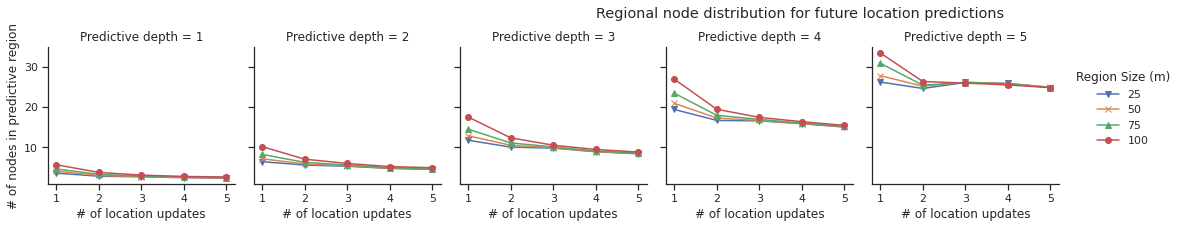

In [42]:
data = df_filtered
data.rename(columns = {'predictive_nodes':'# of nodes in predictive region'}, inplace = True)
sns.set(style="ticks")
g = sns.FacetGrid(data, col='predictive_step', 
                  hue='region_size', col_wrap=5,
                  hue_kws=dict(marker=["v", "x", "^", "o"]))
g = (g.map(plt.plot, 'current_step', '# of nodes in predictive region').add_legend(bbox_to_anchor=(0.93, 0.8), loc='upper left').set_titles('Predictive depth = {col_name}'))
g._legend.set_title('Region Size (m)')
g.set(xlabel='# of location updates')
g.fig.suptitle('Regional node distribution for future location predictions', y=1.05, x=0.7)

g.savefig('./pred_nodes.svg', format='svg')

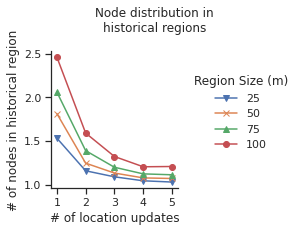

In [29]:
# data = data.drop(['predictive_nodes'], axis=1)
data = data.groupby(['current_step', 'region_size'],  as_index=False).mean()
data['spec'] = 0
sns.set(style="ticks")
g = sns.FacetGrid(data, 
                  hue='region_size', col='spec',
                  hue_kws=dict(marker=["v", "x", "^", "o"]))
g = (g.map(
    plt.plot, 
    'current_step', 
    'historic_nodes').add_legend(bbox_to_anchor=(0.75, 0.8), loc='upper left')
    ).set_titles('')#"Accuracy rates for present\n location predictions", y=1.1)
g.set(ylim=(None, None))
g.set(xticks=range(1,6))
g._legend.set_title('Region Size (m)')
g.set(xlabel='# of location updates', ylabel='# of nodes in historical region')
g.fig.suptitle('Node distribution in\nhistorical regions', fontsize=12, y=1.07, x=0.65)
g.savefig('./hist_nodes.svg', format='svg')